* Increse the digree and apply linear regression is called polynomial regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.sample(4)

,TV,Radio,Newspaper,Sales
17,281.4,39.6,55.8,24.4
5,8.7,48.9,75.0,7.2
191,75.5,10.8,6.0,11.9
97,184.9,21.0,22.0,20.5


In [4]:
df.shape

(200, 4)

In [5]:
df.size

800

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe() 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Preprocessing

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

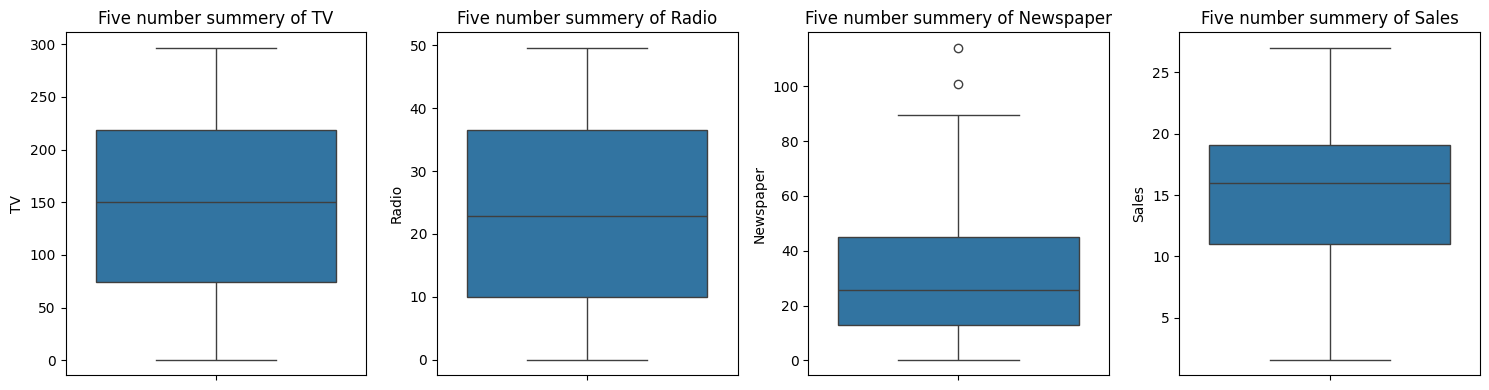

In [10]:
plt.figure(figsize=(15,4))
for index, i in enumerate (df):
    plt.subplot(1,4,index+1)
    sns.boxplot(df[i])
    plt.title(f'Five number summery of {i}')
plt.tight_layout()
plt.show()

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df[df['Newspaper'] == 114.000000]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5


In [13]:
df['Newspaper'].sort_values(ascending = False).head()

16     114.0
101    100.9
75      89.4
165     84.8
118     79.2
Name: Newspaper, dtype: float64

In [14]:
df.sample(3)

,TV,Radio,Newspaper,Sales
41,177.0,33.4,38.7,17.1
62,239.3,15.5,27.3,20.7
73,129.4,5.7,31.3,11.0


In [15]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

*  after seeing the discriptive statistics we have to keep the outlire in the data 

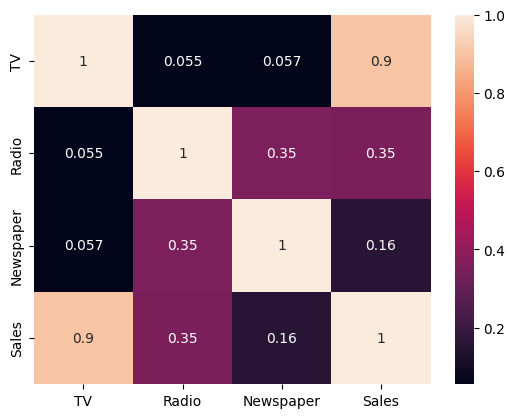

In [16]:
sns.heatmap(df.corr(),annot = True)
plt.show() 

<Axes: ylabel='Density'>

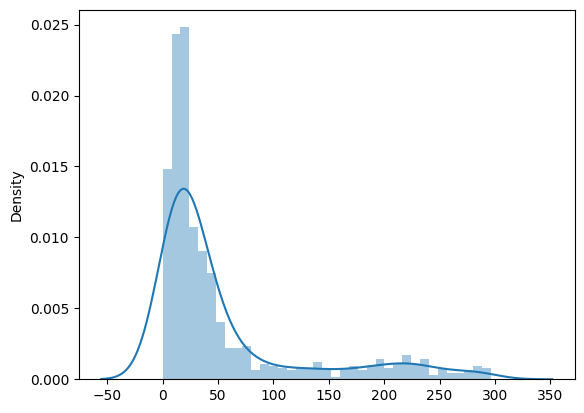

In [17]:
sns.distplot(df)

# Data visulization 

In [18]:
X = df.drop(columns = 'Sales')
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.25)

In [20]:
X_train.sample()

,TV,Radio,Newspaper
199,232.1,8.6,8.7


## polynomial Features

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pollynomial_converter = PolynomialFeatures(degree=2,include_bias = False)# include bias False means it not generate one unimportent columns 
X_train_polly = pd.DataFrame(pollynomial_converter.fit_transform(X_train))
X_train_polly.head()

,0,1,2,3,4,5,6,7,8
0,78.2,46.8,34.5,6115.24,3659.76,2697.90,2190.24,1614.60,1190.25
1,168.4,7.1,12.8,28358.56,1195.64,2155.52,50.41,90.88,163.84
2,8.7,48.9,75.0,75.69,425.43,652.50,2391.21,3667.50,5625.00
3,7.8,38.9,50.6,60.84,303.42,394.68,1513.21,1968.34,2560.36
4,76.4,0.8,14.8,5836.96,61.12,1130.72,0.64,11.84,219.04


In [22]:
X_train_polly.shape

(150, 9)

# Modelling

In [23]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train_polly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.coef_

array([ 7.77912020e-02, -4.17918416e-02, -2.35038157e-03, -1.11332547e-04,
        4.28808837e-04, -3.02207759e-05,  1.56113522e-03,  1.74209291e-04,
        9.73691152e-05])

In [25]:
model.intercept_

np.float64(5.224645758021696)

# Evolution

In [26]:
# Prediction
y_pred_train = model.predict(X_train_polly)

# train r2_score
from sklearn.metrics import r2_score
print('Train_r2_score pearsentage',(r2_score(y_train,y_pred_train)))

Train_r2_score pearsentage 0.9276607239475623


In [27]:
# cross validation score
from sklearn.model_selection import cross_val_score 
print('cross_val_score persentage',(cross_val_score(model,X_train,y_train,cv = 5).mean())*100)

cross_val_score persentage 88.43686673385628


#### in the test data we use only .transform and for the training data .fit_transform i can use **

In [28]:
X_test_polly = pd.DataFrame(pollynomial_converter.transform(X_test))
y_pred_test = model.predict(X_test_polly)
print('Test_r2_score pearsentage',(r2_score(y_test,y_pred_test)))

Test_r2_score pearsentage 0.9485618659991254
